# Leaf epithelium analysis using Python

## How can we infer the cell expansion directions ?

## Imports

In [1]:
import tifffile
from scipy import ndimage as ndi
import skimage
import numpy as np
import napari
from typing import List
from magicgui import magicgui
from napari.types import ImageData, LabelsData, LayerDataTuple
import numpy as np
import glob
import os
import pandas as pd
from skimage import measure
import pandas as pd
from skimage.morphology import convex_hull_image
import matplotlib.pyplot as plt
from skimage.measure import regionprops_table
from skimage.util import map_array
import seaborn as sns
from expansion_utils import *

## ALL USER CHOICE

In [3]:
# Get all the mask images in your computer : change directory with the images 'path'
directory = '/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/data/FDV_cell_database/5 - Elongated_cells_(stomates)'

# Get the dataframe of all the species
mask_path = "/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/3-07"
species_name = "Ceratostigma plumbaginoides"

# Get the parametric map : change the pathways to find a mask image
mask_img_path = "/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/"
label_img_paths = mask_img_path + "4-02/4-02-700x-1-01.tif_label.tif"


## USE CASE

### Get the MASK images

In [4]:
# Get all the mask images

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    create_label(f)

### Convexhull Perimeter, area and perimeter of the cells

In [2]:
# Create the dataframe of all the species : you change the mask_path and the species_name

from expansion_utils import *

df_C_plumbaginoides = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/3-07", "Ceratostigma plumbaginoides")
df_R_damascena_Versicolor = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/3-15", "Rosa x damascena _Versicolor_")
df_P_polystachya = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/4-01", "Persicaria polystachya")
df_P_affinis = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/4-02", "Persicaria affinis")
df_P_tenuifolia = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/4-15", "Paeonia tenuifolia")
df_A_carmichaeliivararendsi = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/4-17", "Aconitum carmichaelii var arendsi")
df_S_inflexa = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/5-20", "Succisella inflexa")
df_S_hispanica = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/5-22", "Scarzonera hispanica")
df_G_rubioides = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/6-19", "Galium rubioides")
df_G_odoratum = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/6-21", "Galium odoratum")
df_D_racemosa = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/7-01", "Danae racemosa")
df_R_japonica = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/7-15", "Rohdea japonica")
df_A_aurea = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/7-23", "Alstroemeria aurea")
df_H_fulva = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/7-24", "Hemerocallis fulva")
df_J_fruticans = measure_species("/home/criuser/Documents/FDV - Informatique/L2 - INFO/Projet _ BIOINFO/FDV_database/results/results - by species/8-06", "Jasminum fruticans")


In [3]:
# Add up all the dataframes

df_all_species = pd.concat([df_C_plumbaginoides, df_R_damascena_Versicolor, df_P_polystachya, df_P_affinis, 
                            df_P_tenuifolia, df_A_carmichaeliivararendsi, df_S_inflexa, 
                            df_S_hispanica, df_G_rubioides, df_G_odoratum, df_D_racemosa, df_R_japonica, 
                            df_A_aurea, df_H_fulva, df_J_fruticans])
df_all_species 

,label,area,perimeter,convexhull_perimeter,lobeyness,species
0,1,746,118.769553,115.941125,1.024395,Ceratostigma plumbaginoides
1,2,864,124.461941,124.669048,0.998339,Ceratostigma plumbaginoides
2,3,2204,253.858910,223.438600,1.136146,Ceratostigma plumbaginoides
3,4,1466,160.953319,157.539105,1.021672,Ceratostigma plumbaginoides
4,5,225,60.763456,60.970563,0.996603,Ceratostigma plumbaginoides
...,...,...,...,...,...,...
675,162,214,53.112698,53.112698,1.000000,Jasminum fruticans
676,163,451,93.426407,92.426407,1.010819,Jasminum fruticans
677,164,264,70.698485,71.112698,0.994175,Jasminum fruticans
678,165,311,79.870058,78.627417,1.015804,Jasminum fruticans


### Create a scatter plot of the area vs lobeyness

In [7]:
# For easier manipulation of the plot
%matplotlib notebook

<IPython.core.display.Javascript object>


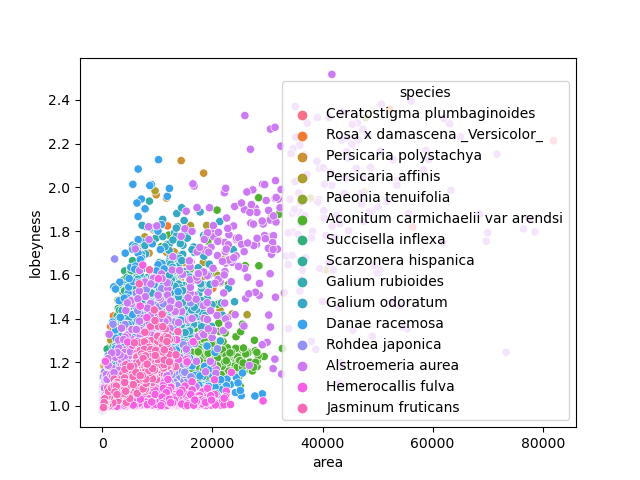

<AxesSubplot:xlabel='area', ylabel='lobeyness'>

In [8]:
plt.figure()

scatter = sns.scatterplot(data = df_all_species  , x ='area', y = 'lobeyness', hue= 'species')
scatter


### Create a violin plot of lobeyness for each species

In [9]:
# For easier manipulation of the plot
%matplotlib notebook

<IPython.core.display.Javascript object>


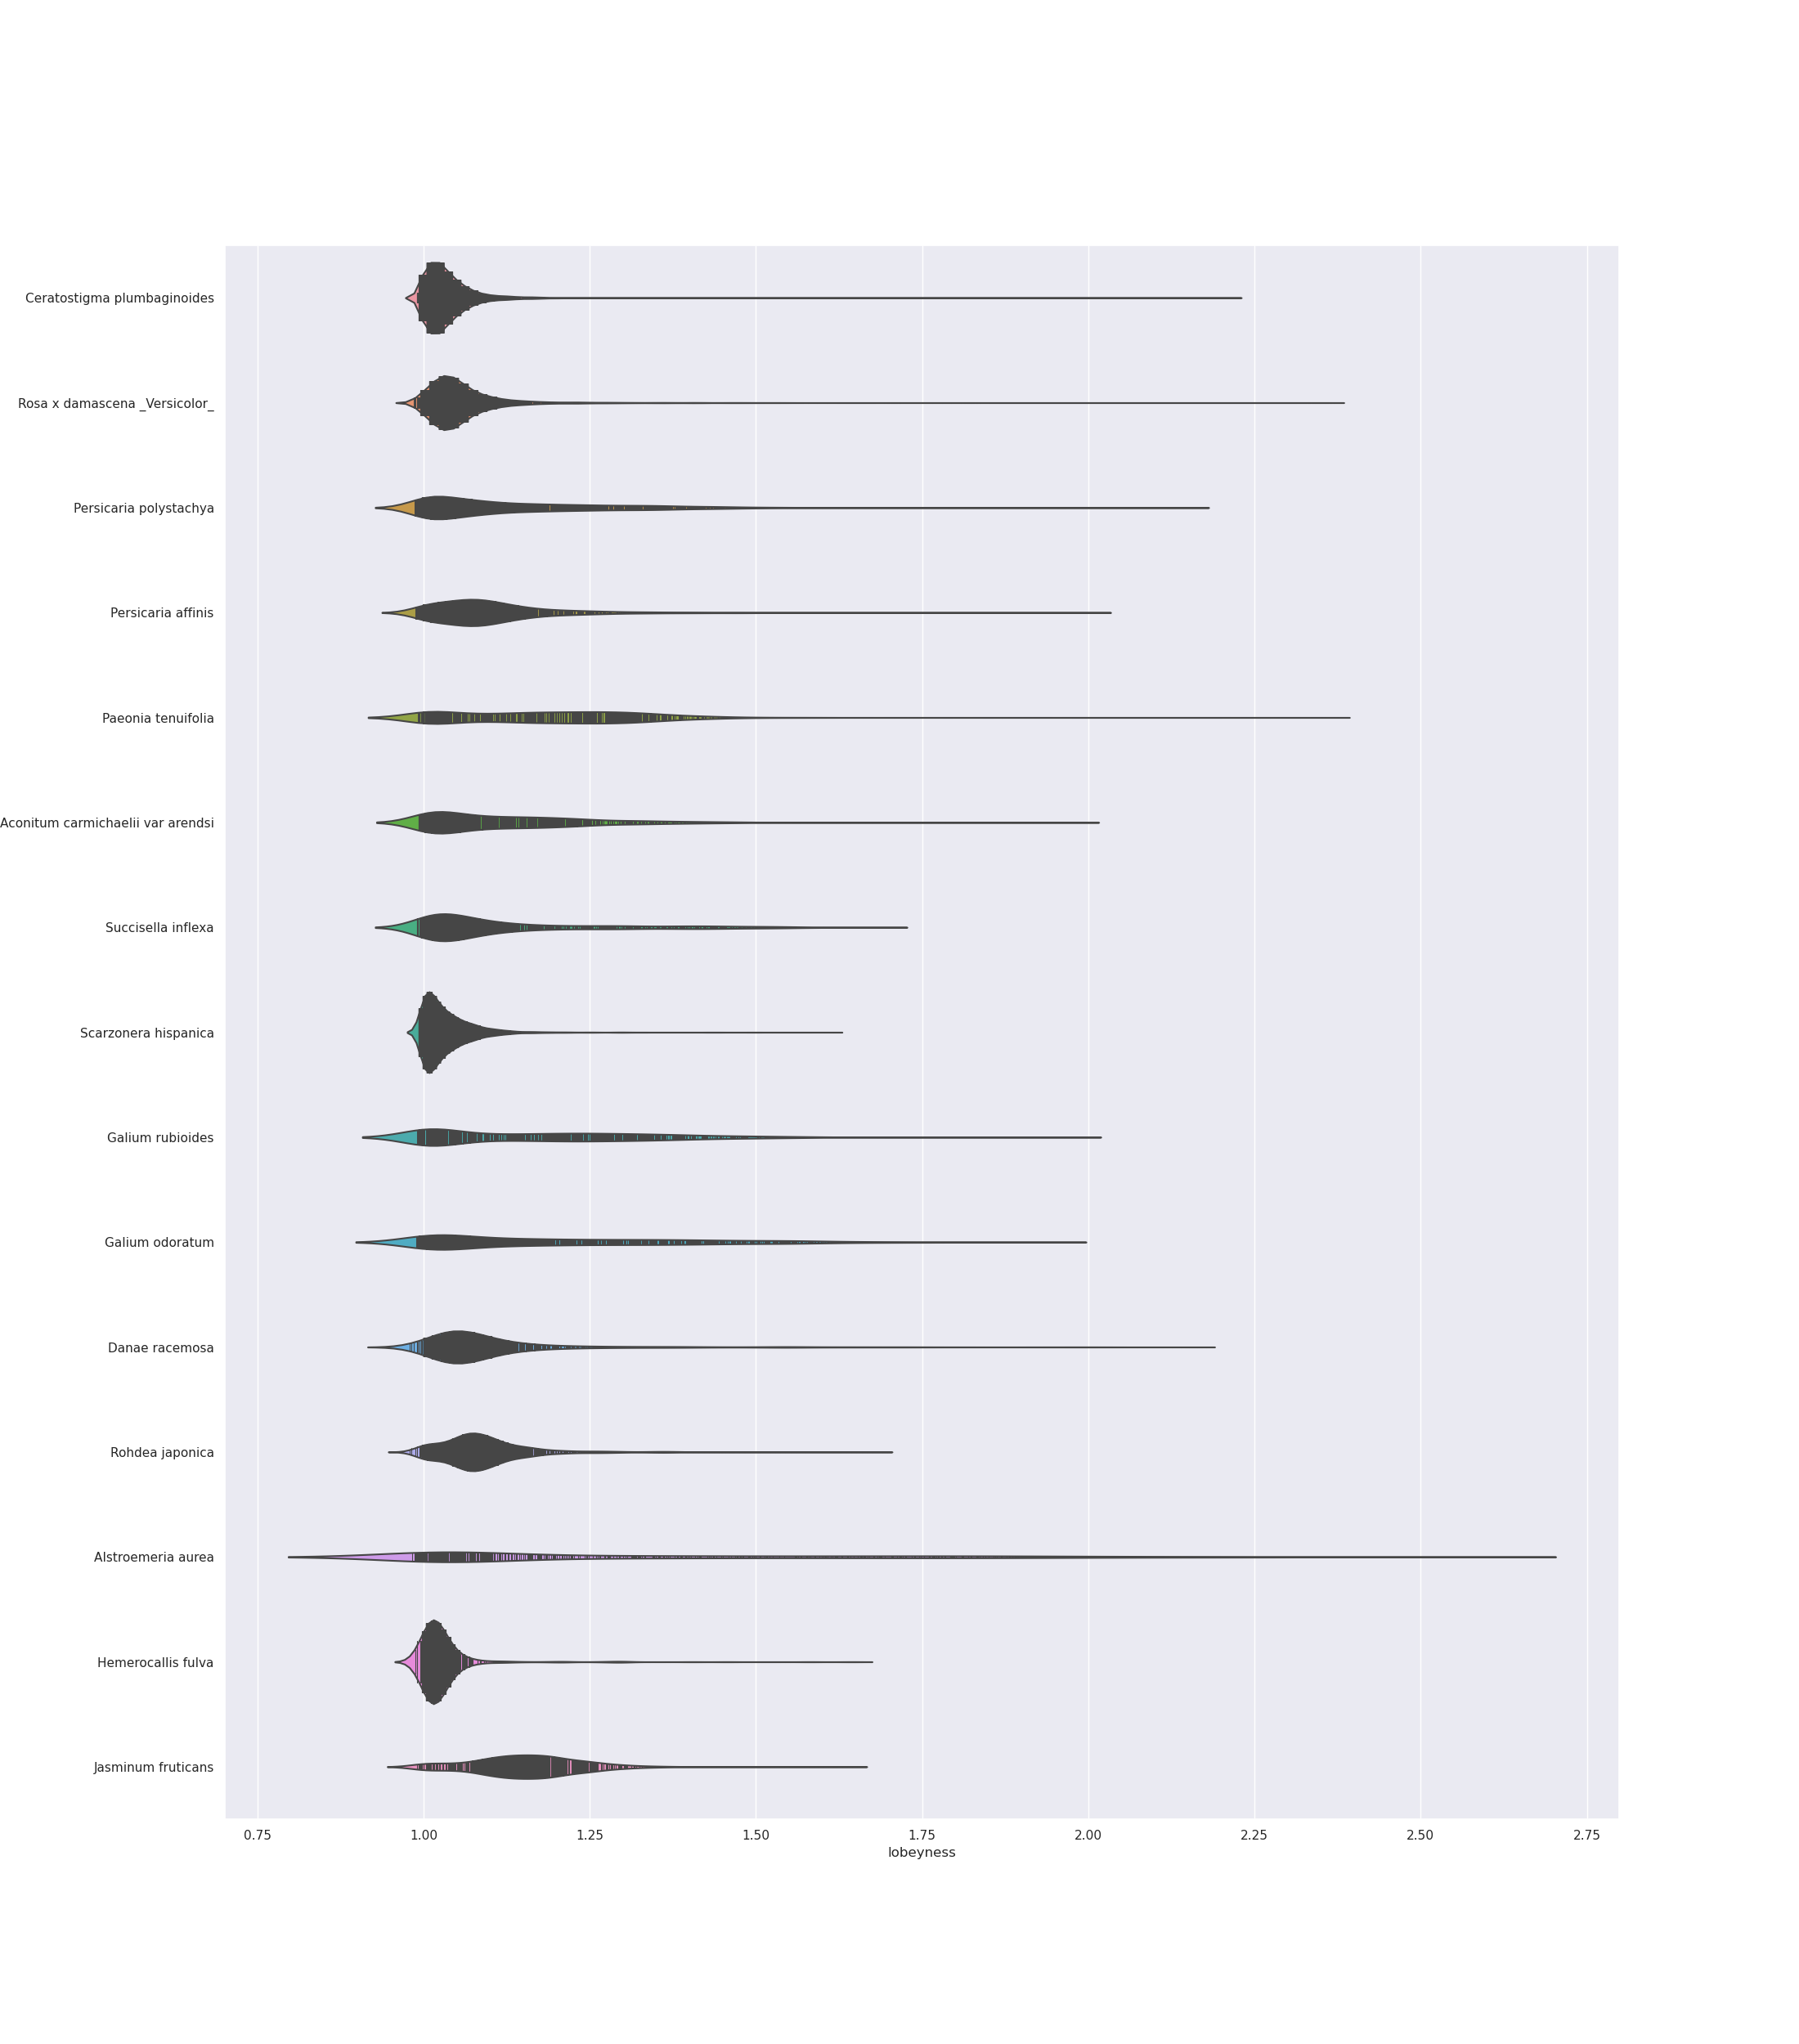

<AxesSubplot:xlabel='lobeyness', ylabel='species'>

In [10]:
sns.set(rc={"figure.figsize":(22,25)})   # Change the dimensions of the image for better visualisation
sns.violinplot(data = df_all_species  , x ='lobeyness', y = 'species', inner = "stick") 

### Parametric map

In [12]:

mask_img_napari = tifffile.imread(label_img_paths)
label_img_napari = skimage.morphology.label(mask_img_napari )

parametric = map_array(
    label_img_napari,
    np.array(df_all_species["label"]),
    np.array(df_all_species["lobeyness"])
    )

viewer = napari.Viewer()
viewer.add_image(parametric, colormap= "turbo")


<Image layer 'parametric' at 0x7f60879c3640>